In [1]:
# 피마 인디언 당뇨병 예측

* Pregnancies: 임신횟수


* Glucose: 포도당 부하 검사 수치


* BloodPressure: 혈압


* SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)


* Insulin: 혈청 인슐린


* BMI: 체질량지수(체중(kg)/키(m))^2)


* DiabetesPedigreeFunction: 당뇨 내력 가중치값


* Age: 나이


* Outcome: 클래스 결정 값(0또는 1)

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [19]:
# 로지스틱 회귀
# 의사결정나무
# 랜덤포레스트

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# train_test_split
# 정확도, 재현율, 정밀도, 혼동행렬, f1, roc_auc 호출

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [20]:
diabetes_df = pd.read_csv('D:/pythonTest/diabetes.csv')

In [21]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [22]:
diabetes_df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [23]:
def get_metrics(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    p_score = precision_score(y_test,pred)
    r_score = recall_score(y_test,pred)
    roc_auc = roc_auc_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    
    # 혼동행렬부터 출력하기
    print('혼동행렬')
    print(confusion)
    
    # 결과지표 print문 
    print('accuracy:', np.round(accuracy,4),
         'precision:', np.round(p_score,4),
         'recall:', np.round(r_score,4),
         'roc_auc:', np.round(roc_auc,4),
         'f1_score:', np.round(f1,4))

In [24]:
X = diabetes_df.drop('Outcome',axis=1)

# y = diabetes_df['Outcome']
# y = diabetes_df.Outcome
y = diabetes_df.iloc[:,-1]

In [40]:
# train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y) 

# fitting 시작
# lr_clf
print('### 로지스틱회귀\n')
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred_lr = lr_clf.predict(X_test)
get_metrics(y_test,pred_lr)

# dt_clf
print('\n###의사결정나무\n')
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
pred_dt = dt_clf.predict(X_test)
get_metrics(y_test,pred_dt)

# rf_clf
print('\n###랜덤포레스트\n')
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
pred_rf = rf_clf.predict(X_test)
get_metrics(y_test,pred_rf)

### 로지스틱회귀

혼동행렬
[[88 12]
 [19 35]]
accuracy: 0.7987 precision: 0.7447 recall: 0.6481 roc_auc: 0.7641 f1_score: 0.6931

###의사결정나무

혼동행렬
[[81 19]
 [23 31]]
accuracy: 0.7273 precision: 0.62 recall: 0.5741 roc_auc: 0.692 f1_score: 0.5962

###랜덤포레스트

혼동행렬
[[86 14]
 [17 37]]
accuracy: 0.7987 precision: 0.7255 recall: 0.6852 roc_auc: 0.7726 f1_score: 0.7048


In [41]:
def p_r_curve_plot(y_test, pred_proba):
    # threshold ndarray로 가져와보고 
    # 위의 threshold에 따른 정밀도, 재현율의 ndarray를 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
    
    # X축 = threshold
    # y축은 precision(점선) 및 recall(주황선) 설정
    # 각 곡선을 중첩되게 graph화
    plt.figure(figsize=(8,6))
    threshold_boudary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boudary], linestyle='--', label='precison')
    plt.plot(thresholds, recalls[0:threshold_boudary], label='recall')
    
    # threshold 값 x 축의 scale을 0,1으로 scaling
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.10),2))
    
    # X축, y축 label 및 legend 추가
    # grid도 추가
    plt.xlabel('Threshold_value')
    plt.ylabel('Precision and Recall')
    plt.legend()
    plt.grid()
    plt.show() 

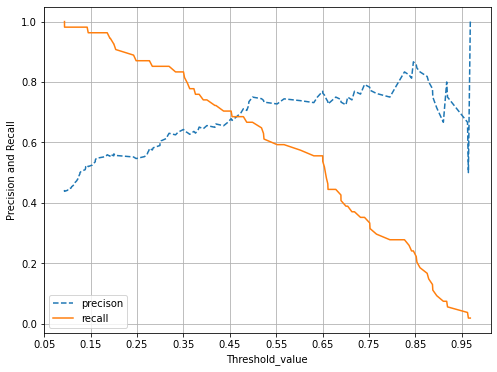

In [43]:
from sklearn.metrics import precision_recall_curve

pred_proba = lr_clf.predict_proba(X_test)[:,1]
p_r_curve_plot(y_test,pred_proba)

In [44]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([ 35.,   1.,   2.,  13., 107., 261., 243.,  87.,  14.,   5.]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <BarContainer object of 10 artists>)

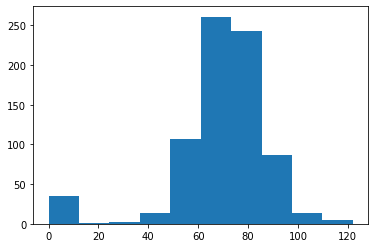

In [45]:
plt.hist(diabetes_df['BloodPressure'], bins=10)

In [ ]:
# 위의 데이터는 혈압이라는 컬럼의 histogram인데 값을 살펴보면 0에서 값이 도출됨
# 이상한 현상이어서 Null값의 imputation인지를 살펴보기 위하여 
# 0값이 있는 몇몇의 ftrs 확인 :: 

In [48]:
diabetes_df[diabetes_df==0].columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [54]:
# 0값이 있는 ftrs의 비율 측정

zero_ftrs = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI'] 

total_cnt = diabetes_df.Glucose.count() # 어차피 총계의 값은 같을 것이므로

for ftr in zero_ftrs:
    z_cnt = diabetes_df[diabetes_df[ftr]==0][ftr].count()
    print('{0}의 zero의 개수는{1}, percent는 {2:.2f} %'.format(ftr,z_cnt,(z_cnt/total_cnt)*100))
    
## outcome의 경우 y값이므로 제외 - 그외, pregnancies 등의 컬럼들 제외

Glucose의 zero의 개수는5, percent는 0.65 %
BloodPressure의 zero의 개수는35, percent는 4.56 %
SkinThickness의 zero의 개수는227, percent는 29.56 %
Insulin의 zero의 개수는374, percent는 48.70 %
BMI의 zero의 개수는11, percent는 1.43 %


In [60]:
mean_zero_ftrs = diabetes_df[zero_ftrs].mean() # 평균값을 통한 imputation

zero_ftrs = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'] 
diabetes_df[zero_ftrs] = diabetes_df[zero_ftrs].replace(0,mean_zero_ftrs)
diabetes_df[zero_ftrs].head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.000000,79.799479,33.6
1,85.0,66.0,29.000000,79.799479,26.6
2,183.0,64.0,20.536458,79.799479,23.3
3,89.0,66.0,23.000000,94.000000,28.1
4,137.0,40.0,35.000000,168.000000,43.1


In [71]:
X_scaled = diabetes_df.drop(['Outcome'], axis=1)
y_scaled = diabetes_df.Outcome

# train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size= 0.2,
                                                   stratify=y)

# 정제된 데이터로 fitting 재시작
# lr_clf
print('### 로지스틱회귀\n')
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred_lr = lr_clf.predict(X_test)
get_metrics(y_test,pred_lr)

# dt_clf
print('\n###의사결정나무\n')
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
pred_dt = dt_clf.predict(X_test)
get_metrics(y_test,pred_dt)

# rf_clf
print('\n###랜덤포레스트\n')
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
pred_rf = rf_clf.predict(X_test)
get_metrics(y_test,pred_rf)

### 로지스틱회귀

혼동행렬
[[90 10]
 [25 29]]
accuracy: 0.7727 precision: 0.7436 recall: 0.537 roc_auc: 0.7185 f1_score: 0.6237

###의사결정나무

혼동행렬
[[72 28]
 [24 30]]
accuracy: 0.6623 precision: 0.5172 recall: 0.5556 roc_auc: 0.6378 f1_score: 0.5357

###랜덤포레스트

혼동행렬
[[82 18]
 [19 35]]
accuracy: 0.7597 precision: 0.6604 recall: 0.6481 roc_auc: 0.7341 f1_score: 0.6542


In [72]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    Iter = 0
    for custom_threshold in thresholds:
        Iter +=1
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계치', custom_threshold)
        accuracy = accuracy_score(y_test, custom_predict)
        p_score = precision_score(y_test, custom_predict)
        r_score = recall_score(y_test, custom_predict)
        F_score = f1_score(y_test, custom_predict)
        ra_score = roc_auc_score(y_test, custom_predict)
        print('{0}번째 시행\n accuracy:{1:.4f},prescision:{2:.4f},recall:{3:.4f}, f1:{4:.4f}, roc_auc:{5:.4f} \n'.format(Iter,accuracy,p_score,r_score,F_score,ra_score))

In [73]:
threshold = [0.1,0.2,0.3,0.4,0.45,0.50,0.55,0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), threshold)

임계치 0.1
1번째 시행
 accuracy:0.5000,prescision:0.4122,recall:1.0000, f1:0.5838, roc_auc:0.6150 

임계치 0.2
2번째 시행
 accuracy:0.6558,prescision:0.5051,recall:0.9259, f1:0.6536, roc_auc:0.7180 

임계치 0.3
3번째 시행
 accuracy:0.7208,prescision:0.5733,recall:0.7963, f1:0.6667, roc_auc:0.7381 

임계치 0.4
4번째 시행
 accuracy:0.7468,prescision:0.6364,recall:0.6481, f1:0.6422, roc_auc:0.7241 

임계치 0.45
5번째 시행
 accuracy:0.7922,prescision:0.7500,recall:0.6111, f1:0.6735, roc_auc:0.7506 

임계치 0.5
6번째 시행
 accuracy:0.7727,prescision:0.7436,recall:0.5370, f1:0.6237, roc_auc:0.7185 

임계치 0.55
7번째 시행
 accuracy:0.7532,prescision:0.7353,recall:0.4630, f1:0.5682, roc_auc:0.6865 

임계치 0.6
8번째 시행
 accuracy:0.7597,prescision:0.7742,recall:0.4444, f1:0.5647, roc_auc:0.6872 



In [74]:
# end of file